
#  偏微分方程式(1次元の例題)


# 1. 例題
未知の関数$u$は$x$ (場所)と$t$ (時刻)の関数(丁寧に書けば$u(t, x)$)で,

$0 < x < 1$で
$$ \frac{\partial u}{\partial t} = k\frac{\partial u}{\partial x}, $$
および
$$ u(t, 0) = u(t, 1) = 0 $$
を満たす. 

場所は$x$座標ひとつなので1次元の問題.

ある時刻$t$における$u(t, x)$がわかっていれば右辺が計算でき, それによって
$$ \frac{\partial u}{\partial t} $$ 
が与えられるわけだから, 少し時間が経過した後の$u$, つまり, $u(t+\Delta t, x)$がわかる. 

ので, 理屈はこれまで質点の運動方程式をといてきたときと変わらない.

```
for in range(n_steps):
  u = u + 右辺 * dt
```

違いは, ある時刻における状態が, これまではたかだか質点1つの位置(と速度)だったのに対して, すべて(多数)の$x$における値になることだけ. もちろん文字通りすべての(無限の)場所における$u$を保持することは無理なので, 値を保持する$x$の場所を適当な間隔で設定してそれらにおける値だけを追跡することにする. そのために配列が役に立つ.



* まず偏微分程式
$$ \frac{\partial u}{\partial t} = k\frac{\partial u}{\partial x}, $$

を離散化すると,

$$ \frac{u(t+\Delta t,x) - u(t,x)}{\Delta t} \approx k\frac{u(t,x+\Delta x) - u(t,x)}{\Delta x} $$

$$ \therefore
u(t+\Delta t,x)
\approx u(t,x) + (u(t,x+\Delta x) - u(t,x))\frac{k\Delta t}{\Delta x}   $$

* $0 = x_0 < x_1 < \cdots x_n = 1$ と [0,1] 上に$n$個の点を等間隔に取り, 隣り合う点の間隔を$\Delta x$ にする ($\Delta x = 1/n$) とすると, $u(t, x+\Delta x)$は, 配列上で$u(t, x)$の右隣の要素ということになる.


# 2. プログラム化
以下のプログラム`simple_pde(n, n_steps, T)`は
  * 区間$[0,1]$で上記の微分方程式を解く. ただし,
  * ただし, 初期状態($t=0$)で, $u(0, x) = \sin(4\pi x)$とする(深い意味はない)
  * 端点($x = 0, 1$)は, 0に固定されている($u(t, 0) = u(t, 1) = 0$)
  * 結果として$t = T$における$x$の値と$u$の値($u(T, x)$)を返す
  * 区間$[0, 1]$は(n-1)分割, 時間$[0, T]$はn_steps分割する

In [8]:
import numpy as np

def simple_pde(n, n_steps, T):
    k = 0.5
    dt = T / n_steps
    dx = 1 / (n - 1)
    x = np.linspace(0, 1, n)
    u = np.sin(4 * np.pi * x)
    for s in range(n_steps):
        u[1:n-1] = u[1:n-1] + (u[2:n] - u[1:n-1]) * (k * dt / dx)
    return x, u


(array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 array([ 0.00000000e+00, -2.82013310e-02, -2.02086692e-02, -6.01895875e-02,
        -1.29294318e-01, -1.57082127e-01, -1.15782529e-01, -4.98634510e-02,
        -9.85572591e-03, -4.89858720e-16]))


# 3. 結果の可視化

<IPython.core.display.Javascript object>


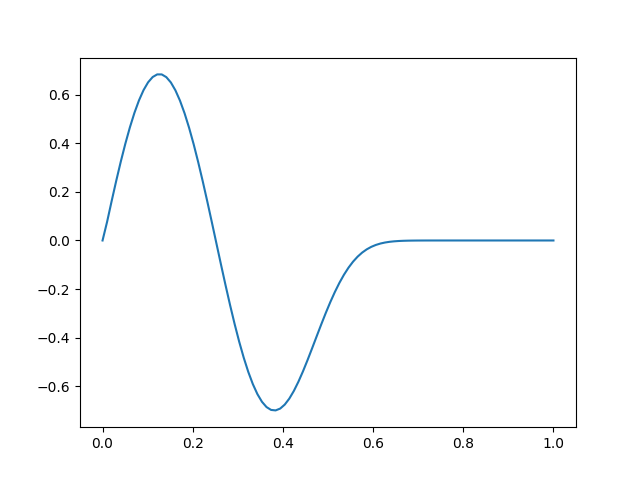

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

def visualize_simple_pde(n, n_steps, T):
    x, u = simple_pde(n, n_steps, T)
    plt.plot(x, u)
    plt.show()

visualize_simple_pde(100, 1000, 1.0)


# 4. アニメーション化

<IPython.core.display.Javascript object>


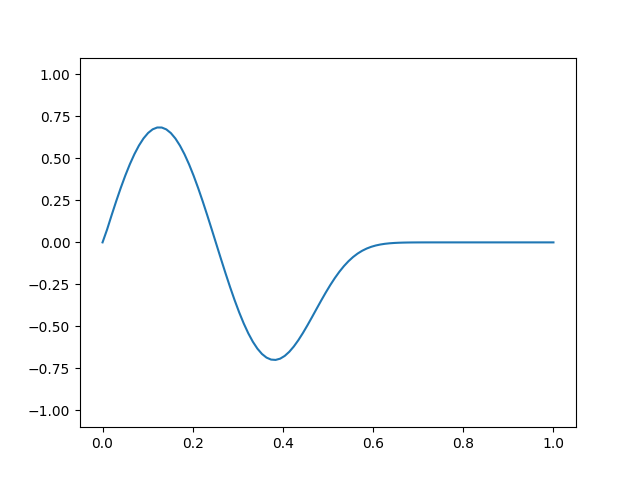

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as anm
import numpy as np

def simple_pde(n, n_steps, T):
    k = 0.5
    dt = T / n_steps
    dx = 1 / (n - 1)
    x = np.linspace(0, 1, n)
    u = np.sin(4 * np.pi * x)
    for s in range(n_steps):
        u[1:n-1] = u[1:n-1] + (u[2:n] - u[1:n-1]) * (k * dt / dx)
        if s == 0:
            [line] = plt.plot(x, u)
        else:
            line.set_data(x, u)
        yield [line]
    return x, u

def animate_simple_pde(n, n_steps, T):
    fig = plt.figure()
    ani = anm.FuncAnimation(fig, lambda x: x, repeat=0,
                            frames=simple_pde(n, n_steps, T), 
                            interval=1)
    plt.show()
    return ani

animate_simple_pde(100, 1000, 1.0)